In [49]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
import scipy as sp
import seaborn as sns

In [36]:
pd.set_option('display.max_columns', None)

In [52]:
# Input Paths
# HEMNET_PREDICTIONS_PATH = Path('/gpfs1/scratch/90days/s4436005/TCGA/03_08_20_v2/Slide_Predictions.csv')
# TUMOUR_PURITY_PATH = Path('/gpfs1/scratch/90days/s4436005/TCGA/COAD_tumor_purity.txt')
# TP53_PATH = Path('/QRISdata/Q1139/ST_Projects/HEMnet/HEMnet_Data/TCGA/COAD/samples_with_TP53.txt'
CLINICAL_PATH = Path('/QRISdata/Q1139/ST_Projects/HEMnet/HEMnet_Data/TCGA/COAD/COADREAD_clin_all.proc.txt')
HEMNET_TCGA_PATH = Path('/QRISdata/Q1139/ST_Projects/HEMnet/Figure_Data/TCGA_Validation/hemnet_tcga_combined.csv')
OUTPUT_PATH = Path('/QRISdata/Q1139/ST_Projects/HEMnet/Figure_Data/TCGA_Validation/20210619')

In [10]:
VERBOSE = True

#Verbose functions
if VERBOSE:
    verbose_print = lambda *args: print(*args)
    verbose_save_img = lambda img, path, img_type: img.save(path, img_type)
    verbose_save_fig = lambda fig, path, dpi=300: fig.savefig(path, dpi=dpi, bbox_inches = 'tight')
else:
    verbose_print = lambda *args: None
    verbose_save_img = lambda *args: None
    verbose_save_fig = lambda *args: None

In [14]:
# Load HEMnet predictions and sequencing estimates of tumour purity
# hemnet_preds = pd.read_csv(HEMNET_PREDICTIONS_PATH, index_col = 0)
# tumour_purity = pd.read_csv(TUMOUR_PURITY_PATH, sep = '\t')
# tp53 = pd.read_csv(TP53_PATH, sep = '\t', header=None)
clinical = pd.read_csv(CLINICAL_PATH, sep='\t')
hemnet_tcga = pd.read_csv(HEMNET_TCGA_PATH, index_col=0)

In [15]:
hemnet_tcga

,WSI_Area_mm^2,Tissue_Area_mm^2,Tiles,Cancer_Tiles,Cancer_Tile_Proportion,Average_Sigmoid_Value,Weighted_Average_Sigmoid_Value,Cancer_Area_Proportion,index,ESTIMATE,...,CPE,num_subpop,expands,infinium,Purity_ABSOLUTE,Sample_ID,Mutation_Type,2,3,4
A6-5656,261.263280,18.582312,529,470,0.888469,0.881185,0.981599,0.994096,35.5,0.9606,...,0.71410,3.0,0.879379,0.63,NaN,TCGA-A6-5656-01A-21D-A270-10,Missense_Mutation,7675143.0,C,C
A6-6650,448.667800,76.959151,1901,1633,0.859022,0.859600,0.950363,0.959655,56.5,0.9562,...,0.75715,5.0,0.997606,0.71,NaN,TCGA-A6-6650-01A-11D-1771-10,Missense_Mutation,7675088.0,C,C
AA-3715,318.484992,74.106151,7886,6533,0.828430,0.798354,0.867347,0.906945,140.0,NaN,...,0.72230,12.0,0.951328,NaN,NaN,NaN,None,NaN,NaN,NaN
AA-3973,127.581053,44.203969,4919,3363,0.683676,0.672533,0.676276,0.690780,190.0,NaN,...,0.89560,3.0,0.897513,NaN,NaN,NaN,None,NaN,NaN,NaN
AD-6889,220.427871,121.542617,3032,2764,0.911609,0.913845,0.988469,0.993960,249.0,0.9399,...,0.87130,8.0,0.755034,0.42,NaN,TCGA-AD-6889-01A-11D-1924-10,3'UTR,7669464.0,C,C
AZ-4615,560.408169,235.959044,6421,3640,0.566890,0.572427,0.683100,0.687635,278.0,0.7739,...,0.75090,5.0,0.775833,0.56,0.67,NaN,None,NaN,NaN,NaN
AZ-4682,539.756465,174.562005,5569,2602,0.467229,0.472993,0.659051,0.669187,281.0,0.9415,...,0.86710,1.0,0.917527,0.74,NaN,NaN,None,NaN,NaN,NaN
AZ-5403,852.984560,638.188401,13865,3567,0.257266,0.285828,0.298597,0.270921,283.0,0.8700,...,0.75420,3.0,0.938637,0.50,NaN,TCGA-AZ-5403-01A-01D-1650-10,Missense_Mutation,7675052.0,C,C
CA-6715,395.608075,232.717673,5840,3560,0.609589,0.594119,0.664879,0.700154,299.0,0.9696,...,0.94730,2.0,0.890365,0.79,NaN,TCGA-CA-6715-01A-21D-1835-10,Missense_Mutation,7674893.0,C,C
CK-5913,488.024176,291.187584,7160,3044,0.425140,0.439001,0.481065,0.474003,310.0,0.8486,...,0.77580,5.0,0.720724,0.67,NaN,NaN,None,NaN,NaN,NaN


In [16]:
clinical

,sample,Age,Gender,Race,Country,ClinicalStage,T-Status,M-Status,N-Status,MSIstatus,...,DaysToLastFollowup,VitalStatus,PAM50clust,RPPAclustersBRCA,GeneExpSubtype,TripleMarker,RPPAclustersCNMF,EBVpresent,MolecularSubtype,CMS-RFclassifier
0,TCGA-AA-3713,68,1,NaN,germany,4.0,3.0,1.0,0.0,3.0,...,579.0,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,CMS1
1,TCGA-CA-6718,46,1,asian,vietnam,2.0,3.0,0.0,0.0,1.0,...,3.0,1,NaN,NaN,NaN,NaN,3.0,NaN,NaN,CMS1
2,TCGA-F4-6463,51,1,white,russia,2.0,3.0,0.0,0.0,1.0,...,1087.0,0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,CMS4
3,TCGA-AG-3731,65,1,NaN,germany,4.0,3.0,1.0,1.0,2.0,...,1126.0,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,TCGA-AA-3688,80,1,NaN,germany,4.0,3.0,1.0,1.0,2.0,...,578.0,0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,CMS2
5,TCGA-AA-3695,63,0,NaN,germany,4.0,3.0,1.0,2.0,1.0,...,NaN,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NOLBL
6,TCGA-AA-3681,77,0,NaN,germany,3.0,3.0,0.0,1.0,1.0,...,182.0,0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NOLBL
7,TCGA-NH-A8F7,53,0,black,usa,2.0,3.0,NaN,0.0,NaN,...,543.0,0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
8,TCGA-D5-6541,49,1,white,poland,2.0,3.0,0.0,0.0,1.0,...,474.0,0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,CMS4
9,TCGA-AG-3890,62,1,NaN,germany,1.0,2.0,0.0,0.0,1.0,...,518.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CMS2


In [26]:
#Get sample ID
clinical['ID'] = clinical['sample'].str.replace(r'TCGA-', '')

In [31]:
clinical = clinical.reset_index()
clinical = clinical.set_index('ID')
clinical.head()

,index,sample,Age,Gender,Race,Country,ClinicalStage,T-Status,M-Status,N-Status,...,DaysToLastFollowup,VitalStatus,PAM50clust,RPPAclustersBRCA,GeneExpSubtype,TripleMarker,RPPAclustersCNMF,EBVpresent,MolecularSubtype,CMS-RFclassifier
ID,,,,,,,,,,,,,,,,,,,,,
AA-3713,0,TCGA-AA-3713,68,1,NaN,germany,4.0,3.0,1.0,0.0,...,579.0,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,CMS1
CA-6718,1,TCGA-CA-6718,46,1,asian,vietnam,2.0,3.0,0.0,0.0,...,3.0,1,NaN,NaN,NaN,NaN,3.0,NaN,NaN,CMS1
F4-6463,2,TCGA-F4-6463,51,1,white,russia,2.0,3.0,0.0,0.0,...,1087.0,0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,CMS4
AG-3731,3,TCGA-AG-3731,65,1,NaN,germany,4.0,3.0,1.0,1.0,...,1126.0,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
AA-3688,4,TCGA-AA-3688,80,1,NaN,germany,4.0,3.0,1.0,1.0,...,578.0,0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,CMS2


In [34]:
hemnet_tcga_clinical = pd.concat([hemnet_tcga, clinical], join='inner', axis=1)

In [37]:
hemnet_tcga_clinical

,WSI_Area_mm^2,Tissue_Area_mm^2,Tiles,Cancer_Tiles,Cancer_Tile_Proportion,Average_Sigmoid_Value,Weighted_Average_Sigmoid_Value,Cancer_Area_Proportion,index,ESTIMATE,ABSOLUTE,LUMP,IHC,CPE,num_subpop,expands,infinium,Purity_ABSOLUTE,Sample_ID,Mutation_Type,2,3,4,index,sample,Age,Gender,Race,Country,ClinicalStage,T-Status,M-Status,N-Status,MSIstatus,HistoGrade,HistoType,PrimaryTherapyOutcome,PriorMalignancy,FamilyHistory,SmokingHistory,HPVp16,HPVish,PyloriInfection,DaysToDeath,DaysToLastFollowup,VitalStatus,PAM50clust,RPPAclustersBRCA,GeneExpSubtype,TripleMarker,RPPAclustersCNMF,EBVpresent,MolecularSubtype,CMS-RFclassifier
A6-5656,261.263280,18.582312,529,470,0.888469,0.881185,0.981599,0.994096,35.5,0.9606,0.81,0.7735,0.71360,0.71410,3.0,0.879379,0.63,NaN,TCGA-A6-5656-01A-21D-A270-10,Missense_Mutation,7675143.0,C,C,572,TCGA-A6-5656,74,1,white,NaN,1.0,2.0,0.0,0.0,1.0,NaN,colon,CompleteRemission,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1001.0,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,CMS2
A6-6650,448.667800,76.959151,1901,1633,0.859022,0.859600,0.950363,0.959655,56.5,0.9562,0.81,0.8178,0.87135,0.75715,5.0,0.997606,0.71,NaN,TCGA-A6-6650-01A-11D-1771-10,Missense_Mutation,7675088.0,C,C,228,TCGA-A6-6650,69,0,black,usa,2.0,3.0,0.0,0.0,1.0,NaN,colon,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,627.0,0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,CMS2
AA-3715,318.484992,74.106151,7886,6533,0.828430,0.798354,0.867347,0.906945,140.0,NaN,0.47,NaN,0.82500,0.72230,12.0,0.951328,NaN,NaN,NaN,None,NaN,NaN,NaN,613,TCGA-AA-3715,77,1,NaN,germany,2.0,3.0,0.0,0.0,3.0,NaN,colon,NaN,NaN,0.0,NaN,NaN,NaN,NaN,579.0,30.0,1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,CMS1
AA-3973,127.581053,44.203969,4919,3363,0.683676,0.672533,0.676276,0.690780,190.0,NaN,0.92,NaN,0.90000,0.89560,3.0,0.897513,NaN,NaN,NaN,None,NaN,NaN,NaN,356,TCGA-AA-3973,69,1,NaN,germany,4.0,4.0,1.0,1.0,2.0,NaN,colon,stable,NaN,1.0,NaN,NaN,NaN,NaN,NaN,397.0,0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,CMS2
AD-6889,220.427871,121.542617,3032,2764,0.911609,0.913845,0.988469,0.993960,249.0,0.9399,0.87,0.3460,0.80000,0.87130,8.0,0.755034,0.42,NaN,TCGA-AD-6889-01A-11D-1924-10,3'UTR,7669464.0,C,C,25,TCGA-AD-6889,76,1,asian,usa,2.0,3.0,0.0,0.0,3.0,NaN,colon,CompleteRemission,NaN,1.0,NaN,NaN,NaN,NaN,2532.0,2056.0,1,NaN,NaN,NaN,NaN,2.0,NaN,NaN,CMS1
AZ-4615,560.408169,235.959044,6421,3640,0.566890,0.572427,0.683100,0.687635,278.0,0.7739,0.67,0.7129,0.75000,0.75090,5.0,0.775833,0.56,0.67,NaN,None,NaN,NaN,NaN,26,TCGA-AZ-4615,84,1,white,NaN,3.0,3.0,0.0,1.0,3.0,NaN,colon,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1002.0,0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,CMS1
AZ-4682,539.756465,174.562005,5569,2602,0.467229,0.472993,0.659051,0.669187,281.0,0.9415,0.78,0.8272,0.72500,0.86710,1.0,0.917527,0.74,NaN,NaN,None,NaN,NaN,NaN,190,TCGA-AZ-4682,61,1,white,NaN,4.0,3.0,1.0,0.0,1.0,NaN,colon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,680.0,NaN,1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
AZ-5403,852.984560,638.188401,13865,3567,0.257266,0.285828,0.298597,0.270921,283.0,0.8700,0.38,0.7107,0.75000,0.75420,3.0,0.938637,0.50,NaN,TCGA-AZ-5403-01A-01D-1650-10,Missense_Mutation,7675052.0,C,C,369,TCGA-AZ-5403,43,1,white,NaN,2.0,3.0,NaN,0.0,1.0,NaN,colon,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1910.0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CMS4
CA-6715,395.608075,232.717673,5840,3560,0.609589,0.594119,0.664879,0.700154,299.0,0.9696,0.89,0.7615,0.70000,0.94730,2.0,0.890365,0.79,NaN,TCGA-CA-6715-01A-21D-1835-10,Missense_Mutation,7674893.0,C,C,211,TCGA-CA-6715,63,1,asian,vietnam,3.0,3.0,0.0,1.0,1.0,NaN,colon,CompleteRemission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,383.0,0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,CMS2
CK-5913,488.024176,291.187584,7160,3044,0.425140,0.439001,0.481065,0.474003,310.0,0.8486,0.71,0.7184,0.80000,0.77580,5.0,0.720724,0.67,NaN,NaN,None,NaN,NaN,NaN,423,TCGA-CK-5913,58,0,white,usa,2.0,3.0,NaN,0.0,3.0,NaN,colon,CompleteRemission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1561.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CMS1


In [80]:
hemnet_tcga_clinical.to_csv(OUTPUT_PATH.joinpath('hemnet_tcga_clinical.csv'))

In [39]:
hemnet_tcga_clinical.groupby('ClinicalStage')['sample'].nunique()

ClinicalStage
1.0     3
2.0    12
3.0     7
4.0     2
Name: sample, dtype: int64

In [66]:
hemnet_tcga_clinical.groupby('MSIstatus')['sample'].nunique()

MSIstatus
1.0    12
2.0     3
3.0     9
Name: sample, dtype: int64

In [74]:
hemnet_tcga_clinical.groupby('CMS-RFclassifier')['sample'].nunique()

CMS-RFclassifier
CMS1     7
CMS2     8
CMS3     4
CMS4     3
NOLBL    1
Name: sample, dtype: int64

In [61]:
hemnet_tcga_clinical[hemnet_tcga_clinical['ClinicalStage']==1.0]

,WSI_Area_mm^2,Tissue_Area_mm^2,Tiles,Cancer_Tiles,Cancer_Tile_Proportion,Average_Sigmoid_Value,Weighted_Average_Sigmoid_Value,Cancer_Area_Proportion,index,ESTIMATE,ABSOLUTE,LUMP,IHC,CPE,num_subpop,expands,infinium,Purity_ABSOLUTE,Sample_ID,Mutation_Type,2,3,4,index,sample,Age,Gender,Race,Country,ClinicalStage,T-Status,M-Status,N-Status,MSIstatus,HistoGrade,HistoType,PrimaryTherapyOutcome,PriorMalignancy,FamilyHistory,SmokingHistory,HPVp16,HPVish,PyloriInfection,DaysToDeath,DaysToLastFollowup,VitalStatus,PAM50clust,RPPAclustersBRCA,GeneExpSubtype,TripleMarker,RPPAclustersCNMF,EBVpresent,MolecularSubtype,CMS-RFclassifier
A6-5656,261.263280,18.582312,529,470,0.888469,0.881185,0.981599,0.994096,35.5,0.9606,0.81,0.7735,0.7136,0.7141,3.0,0.879379,0.63,NaN,TCGA-A6-5656-01A-21D-A270-10,Missense_Mutation,7675143.0,C,C,572,TCGA-A6-5656,74,1,white,NaN,1.0,2.0,0.0,0.0,1.0,NaN,colon,CompleteRemission,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1001.0,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,CMS2
CM-6171,863.716634,294.104119,7046,6462,0.917116,0.910428,0.966940,0.977721,346.0,0.9107,NaN,0.7921,0.8500,0.8398,10.0,0.965816,0.72,NaN,NaN,None,NaN,NaN,NaN,104,TCGA-CM-6171,77,0,white,usa,1.0,2.0,0.0,0.0,3.0,NaN,colon,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,427.0,0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,CMS1
F4-6856,424.598514,174.409418,4971,385,0.077449,0.113599,0.119360,0.088332,426.0,0.9244,0.60,0.7765,0.8000,0.7520,5.0,0.615965,0.63,NaN,TCGA-F4-6856-01A-11D-1924-10,Nonsense_Mutation,7673704.0,G,G,461,TCGA-F4-6856,45,1,white,russia,1.0,2.0,0.0,0.0,3.0,NaN,colon,CompleteRemission,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1074.0,0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,CMS3


In [54]:
combined = hemnet_tcga_clinical

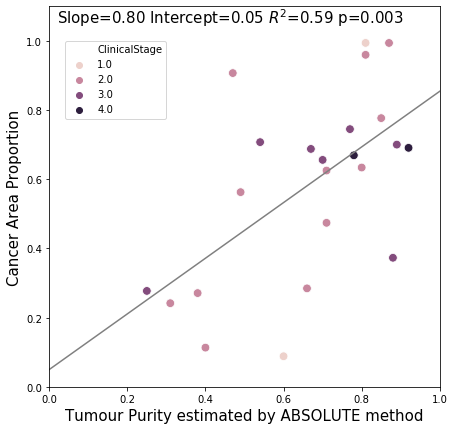

In [72]:
# Label data points by Clinical Status
fig, ax = plt.subplots(figsize = (7,7))
x_column = 'ABSOLUTE'
y_column = 'Cancer_Area_Proportion'
# combined_filtered = combined[[x_column, y_column, 'Mutation_Type']].dropna()
combined_filtered = combined[[x_column, y_column, 'ClinicalStage']].dropna()
x_values = combined_filtered[x_column].values
y_values = combined_filtered[y_column].values

# Classify mutation type impacts
# combined_filtered['ClinicalStage'] = combined_filtered['ClinicalStage'].replace({
#     1.0: 'Stage 1',
#     2.0: 'Stage 2',
#     3.0: 'Stage 3',
#     4.0: 'Stage 4'
# })

# sns.scatterplot(x='ABSOLUTE', y='Cancer_Area_Proportion', hue='ClinicalStage',
#                 hue_order=['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'],
#                 data = combined_filtered, s=75, legend='full', ax = ax)
sns.scatterplot(x='ABSOLUTE', y='Cancer_Area_Proportion', hue='ClinicalStage',
                data = combined_filtered, s=75, legend='full', ax = ax)
ax.legend(title='Clinical Stage')
# plt.legend(bbox_to_anchor=(0.4, 0.91), borderaxespad=0)
plt.legend(bbox_to_anchor=(0.3, 0.91), borderaxespad=0)
linreg = sp.stats.linregress(x_values, y_values)
ax.plot(np.linspace(0,10, 50), linreg.intercept + linreg.slope * np.linspace(0,10, 50), color='grey')
ax.text(0.02 , 1.05 , f'Slope={linreg.slope :.2f} Intercept={linreg.intercept :.2f} $R^2$={linreg.rvalue :.2f} p={linreg.pvalue :.3f}'
       , fontsize = 15)
ax.set_xlabel(f'Tumour Purity estimated by {x_column} method', fontsize = 15)
ax.set_ylabel('Cancer Area Proportion', fontsize = 15)
ax.set_xlim(0,1)
ax.set_ylim(0,1.10)

plt.rcParams['svg.fonttype'] = 'none'
verbose_save_fig(fig, OUTPUT_PATH.joinpath('HEMnet_vs_ABSOLUTE_scatterplot_clinical_stage.svg'))

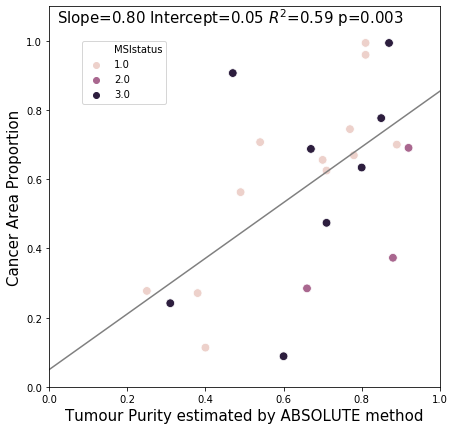

In [76]:
# Label data points by Clinical Status
fig, ax = plt.subplots(figsize = (7,7))
x_column = 'ABSOLUTE'
y_column = 'Cancer_Area_Proportion'
# combined_filtered = combined[[x_column, y_column, 'Mutation_Type']].dropna()
combined_filtered = combined[[x_column, y_column, 'MSIstatus']].dropna()
x_values = combined_filtered[x_column].values
y_values = combined_filtered[y_column].values

# # Classify mutation type impacts
# combined_filtered['ClinicalStage'] = combined_filtered['ClinicalStage'].replace({
#     1.0: 'Stage 1',
#     2.0: 'Stage 2',
#     3.0: 'Stage 3',
#     4.0: 'Stage 4'
# })

sns.scatterplot(x='ABSOLUTE', y='Cancer_Area_Proportion', hue='MSIstatus',
                data = combined_filtered, s=75, legend='full', ax = ax)
ax.legend(title='MSI Status')
# plt.legend(bbox_to_anchor=(0.4, 0.91), borderaxespad=0)
plt.legend(bbox_to_anchor=(0.3, 0.91), borderaxespad=0)
linreg = sp.stats.linregress(x_values, y_values)
ax.plot(np.linspace(0,10, 50), linreg.intercept + linreg.slope * np.linspace(0,10, 50), color='grey')
ax.text(0.02 , 1.05 , f'Slope={linreg.slope :.2f} Intercept={linreg.intercept :.2f} $R^2$={linreg.rvalue :.2f} p={linreg.pvalue :.3f}'
       , fontsize = 15)
ax.set_xlabel(f'Tumour Purity estimated by {x_column} method', fontsize = 15)
ax.set_ylabel('Cancer Area Proportion', fontsize = 15)
ax.set_xlim(0,1)
ax.set_ylim(0,1.10)

plt.rcParams['svg.fonttype'] = 'none'
verbose_save_fig(fig, OUTPUT_PATH.joinpath('HEMnet_vs_ABSOLUTE_scatterplot_MSI_status.svg'))

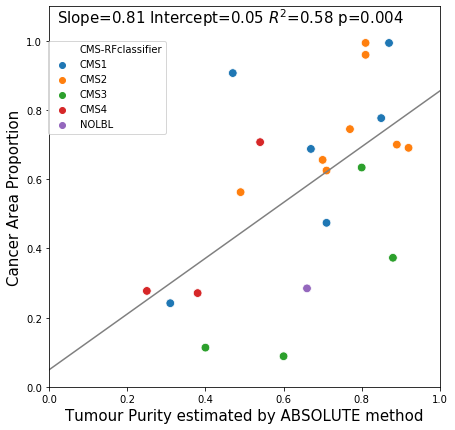

In [79]:
# Label data points by Clinical Status
fig, ax = plt.subplots(figsize = (7,7))
x_column = 'ABSOLUTE'
y_column = 'Cancer_Area_Proportion'
# combined_filtered = combined[[x_column, y_column, 'Mutation_Type']].dropna()
combined_filtered = combined[[x_column, y_column, 'CMS-RFclassifier']].dropna()
x_values = combined_filtered[x_column].values
y_values = combined_filtered[y_column].values

# # Classify mutation type impacts
# combined_filtered['ClinicalStage'] = combined_filtered['ClinicalStage'].replace({
#     1.0: 'Stage 1',
#     2.0: 'Stage 2',
#     3.0: 'Stage 3',
#     4.0: 'Stage 4'
# })

sns.scatterplot(x='ABSOLUTE', y='Cancer_Area_Proportion', hue='CMS-RFclassifier',
                hue_order=['CMS1', 'CMS2', 'CMS3', 'CMS4', 'NOLBL'],
                data = combined_filtered, s=75, legend='full', ax = ax)
ax.legend(title='CMS-RFclassifier')
# plt.legend(bbox_to_anchor=(0.4, 0.91), borderaxespad=0)
plt.legend(bbox_to_anchor=(0.3, 0.91), borderaxespad=0)
linreg = sp.stats.linregress(x_values, y_values)
ax.plot(np.linspace(0,10, 50), linreg.intercept + linreg.slope * np.linspace(0,10, 50), color='grey')
ax.text(0.02 , 1.05 , f'Slope={linreg.slope :.2f} Intercept={linreg.intercept :.2f} $R^2$={linreg.rvalue :.2f} p={linreg.pvalue :.3f}'
       , fontsize = 15)
ax.set_xlabel(f'Tumour Purity estimated by {x_column} method', fontsize = 15)
ax.set_ylabel('Cancer Area Proportion', fontsize = 15)
ax.set_xlim(0,1)
ax.set_ylim(0,1.10)

plt.rcParams['svg.fonttype'] = 'none'
verbose_save_fig(fig, OUTPUT_PATH.joinpath('HEMnet_vs_ABSOLUTE_scatterplot_CMS-RFclassifier.svg'))